<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_12_discrete_morse_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install topopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.4 MB/s eta 0:00:00
  Created wheel for ghalton: filename=ghalton-0.6.1-cp311-cp311-linux_x86_64.whl size=297082 sha256=128d5590775747e9f7b756e31e9110103877c6496fc4d49c69e95cdeeaa974b8
  Stored in directory: /root/.cache/pip/wheels/0d/4f/67/7b68607e7da3bd234a6971b706ded892f06de4eb79dba1eca3
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18170 sha256=0df52dc82427d2a26f3d2e6d46fed29d1c8b02163c5fbca48d20b47365568118
  Stored in directory: /roo

In [4]:
!pip install "numpy<1.26" --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 73.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
nx-cugraph-cu12 25.2.0 requires networkx>=3.2, but you have networkx 2.8.8 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.


In [ ]:
# Install necessary libraries
!pip install trimesh vedo topopy

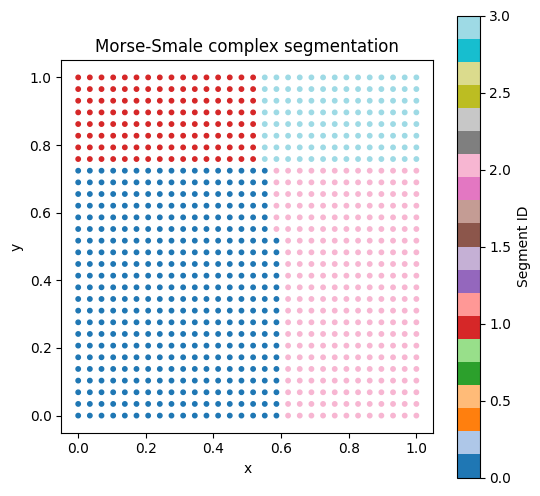

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import topopy
import nglpy as ngl

# Define scalar field (Morse function)
def hill(_x):
  _x = np.atleast_2d(_x)
  x = _x[:, 0]
  y = _x[:, 1]
  return np.exp(- ((x - .55)**2 + (y-.75)**2)/.125) + 0.01*(x + y)

# Create a grid of points
res = 30
x = np.linspace(0, 1, res)
y = np.linspace(0, 1, res)
xx, yy = np.meshgrid(x, y)
X = np.vstack([xx.ravel(), yy.ravel()]).T
Y = hill(X)

# Create neighborhood graph
graph = ngl.EmptyRegionGraph(beta=0.15)  # smaller beta for denser graph

# Build Morse-Smale Complex
msc = topopy.MorseSmaleComplex(graph=graph,
                               gradient='steepest',
                               normalization='feature')
msc.build(X, Y)

# Plot: show segmentation
partition = msc.get_partitions()
labels = np.zeros(len(X), dtype=int)

# Assign a unique label to each Morse cell
for i, (_, point_ids) in enumerate(partition.items()):
    for pid in point_ids:
        labels[pid] = i

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Morse-Smale complex segmentation")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.colorbar(label='Segment ID')
plt.show()


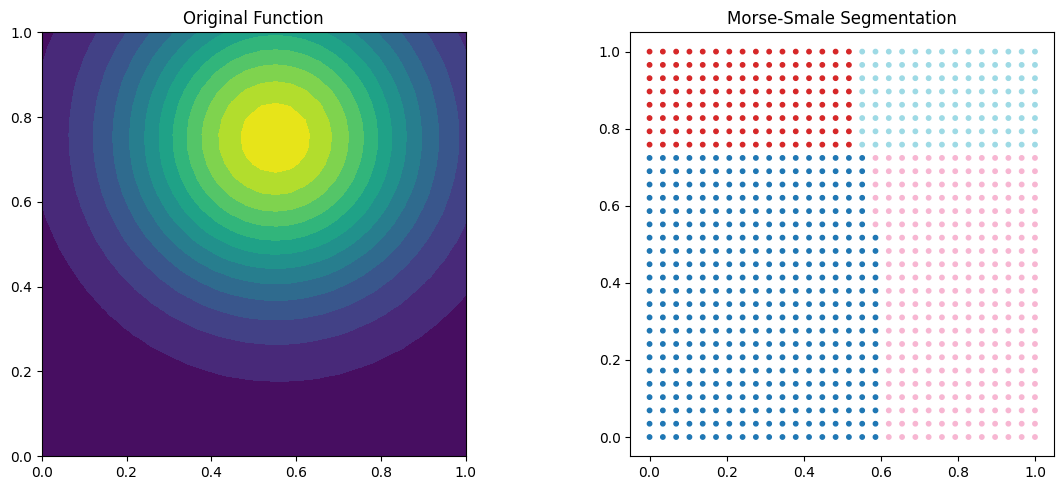

In [20]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.tricontourf(X[:,0], X[:,1], Y, levels=14, cmap='viridis')
plt.title("Original Function")
plt.gca().set_aspect('equal')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Morse-Smale Segmentation")
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()
